In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

import statsmodels.api as sm

/anaconda/envs/research/lib/python3.5/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
df = pd.read_excel('TrainExer64.xlsx')

In [3]:
df.head()

,YEAR,RPK1,RPK2,X1,X2,DX1,DX2
0,1975,13.548751,11.092779,2.606294,2.406294,NaN,NaN
1,1976,13.413939,11.092779,2.596294,2.406294,-0.01,0.00
2,1977,13.413939,11.204263,2.596294,2.416294,0.00,0.01
3,1978,13.684918,11.204263,2.616294,2.416294,0.02,0.00
4,1979,14.243410,11.204263,2.656294,2.416294,0.04,0.00


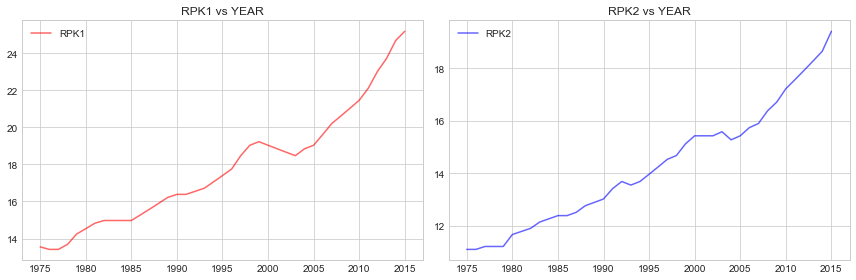

In [48]:
plt.figure(figsize=(12,4))
plt.subplot(121)
plt.plot(df['YEAR'],df['RPK1'], c='r', alpha=0.6)
plt.title('RPK1 vs YEAR')
plt.legend()

plt.subplot(122)
plt.plot(df['YEAR'],df['RPK2'], c='b', alpha=0.6)
plt.title('RPK2 vs YEAR')
plt.legend()
plt.tight_layout();

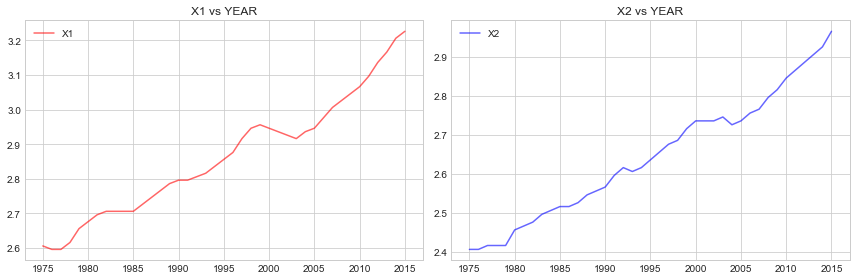

In [49]:
plt.figure(figsize=(12,4))
plt.subplot(121)
plt.plot(df['YEAR'],df['X1'], c='r', alpha=0.6)
plt.title('X1 vs YEAR')
plt.legend()

plt.subplot(122)
plt.plot(df['YEAR'],df['X2'], c='b', alpha=0.6)
plt.title('X2 vs YEAR')
plt.legend()
plt.tight_layout();

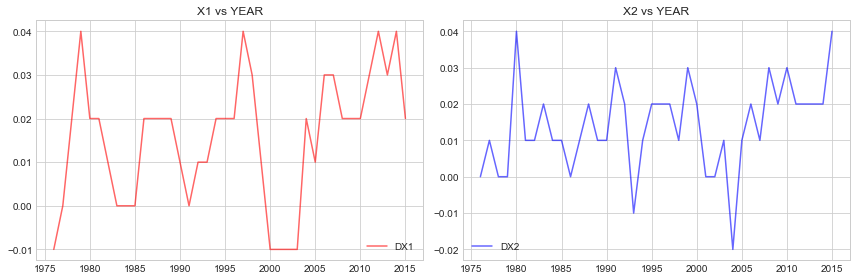

In [50]:
plt.figure(figsize=(12,4))
plt.subplot(121)
plt.plot(df['YEAR'],df['DX1'], c='r', alpha=0.6)
plt.title('X1 vs YEAR')
plt.legend()

plt.subplot(122)
plt.plot(df['YEAR'],df['DX2'], c='b', alpha=0.6)
plt.title('X2 vs YEAR')
plt.legend()
plt.tight_layout();

## Tests on Stationarity
**Augmented Dicky Fuller (ADF )test**

In [71]:
df['DX1_1'], df['X1_1'] = df['DX1'].shift(1), df['X1'].shift(1)
df['DX2_1'], df['X2_1'] = df['DX2'].shift(1), df['X2'].shift(1)

In [72]:
# For RPK1
# Add trend term
X = sm.add_constant(df[['YEAR', 'X1_1', 'DX1_1']])
reg = sm.OLS(df['DX1'][2:], X[2:]).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    DX1   R-squared:                       0.514
Model:                            OLS   Adj. R-squared:                  0.472
Method:                 Least Squares   F-statistic:                     12.32
Date:                Wed, 30 May 2018   Prob (F-statistic):           1.17e-05
Time:                        20:27:16   Log-Likelihood:                 125.00
No. Observations:                  39   AIC:                            -242.0
Df Residuals:                      35   BIC:                            -235.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.5563      1.621     -2.811      0.008      -7.847      -1.265
YEAR           0.0025      0.001      2.815      0.008       0.001       0.004
X1_1          -0.1815      0.066     -2.764      0.009      -0.315      -0.048
DX1_1          0.7606      0.134      5.667      0.000       0.488       1.033
==============================================================================
Omnibus:                        1.651   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.438   Jarque-Bera (JB):                1.511
Skew:                           0.454   Prob(JB):                        0.470
Kurtosis:                       2.678   Cond. No.                     1.95e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.95e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [73]:
# For RPK2
# Add trend term
X = sm.add_constant(df[['YEAR', 'X2_1', 'DX2_1']])
reg = sm.OLS(df['DX2'][2:], X[2:]).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    DX2   R-squared:                       0.115
Model:                            OLS   Adj. R-squared:                  0.040
Method:                 Least Squares   F-statistic:                     1.522
Date:                Wed, 30 May 2018   Prob (F-statistic):              0.226
Time:                        20:27:16   Log-Likelihood:                 119.05
No. Observations:                  39   AIC:                            -230.1
Df Residuals:                      35   BIC:                            -223.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.0101      2.921     -1.373      0.178      -9.939       1.919
YEAR           0.0022      0.002      1.361      0.182      -0.001       0.006
X2_1          -0.1505      0.125     -1.207      0.235      -0.404       0.103
DX2_1          0.1873      0.185      1.010      0.319      -0.189       0.564
==============================================================================
Omnibus:                        5.799   Durbin-Watson:                   1.870
Prob(Omnibus):                  0.055   Jarque-Bera (JB):                6.921
Skew:                          -0.245   Prob(JB):                       0.0314
Kurtosis:                       5.005   Cond. No.                     3.02e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.02e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [74]:
df['DDX1'], df['DDX2']= df['DX1'].diff(), df['DX2'].diff()
df['DDX1_1'], df['DDX2_1'] = df['DDX1'].shift(1), df['DDX2'].shift(1)

In [75]:
# For X1
# Do not add trend
X = sm.add_constant(df[['DX1_1', 'DDX1_1']])
reg = sm.OLS(df['DDX1'][3:], X[3:]).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   DDX1   R-squared:                       0.238
Model:                            OLS   Adj. R-squared:                  0.194
Method:                 Least Squares   F-statistic:                     5.462
Date:                Wed, 30 May 2018   Prob (F-statistic):            0.00862
Time:                        20:27:17   Log-Likelihood:                 118.24
No. Observations:                  38   AIC:                            -230.5
Df Residuals:                      35   BIC:                            -225.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0077      0.003      2.717      0.010       0.002       0.013
DX1_1         -0.4645      0.141     -3.301      0.002      -0.750      -0.179
DDX1_1         0.2073      0.168      1.237      0.224      -0.133       0.547
==============================================================================
Omnibus:                        3.300   Durbin-Watson:                   2.083
Prob(Omnibus):                  0.192   Jarque-Bera (JB):                2.118
Skew:                           0.368   Prob(JB):                        0.347
Kurtosis:                       2.108   Cond. No.                         102.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [76]:
# For X2
# Do not add trend
X = sm.add_constant(df[['DX2_1', 'DDX2_1']])
reg = sm.OLS(df['DDX2'][3:], X[3:]).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   DDX2   R-squared:                       0.394
Model:                            OLS   Adj. R-squared:                  0.360
Method:                 Least Squares   F-statistic:                     11.40
Date:                Wed, 30 May 2018   Prob (F-statistic):           0.000154
Time:                        20:27:18   Log-Likelihood:                 113.65
No. Observations:                  38   AIC:                            -221.3
Df Residuals:                      35   BIC:                            -216.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0127      0.004      3.370      0.002       0.005       0.020
DX2_1         -0.8710      0.235     -3.705      0.001      -1.348      -0.394
DDX2_1         0.0267      0.177      0.151      0.881      -0.332       0.386
==============================================================================
Omnibus:                        2.468   Durbin-Watson:                   1.854
Prob(Omnibus):                  0.291   Jarque-Bera (JB):                1.385
Skew:                          -0.251   Prob(JB):                        0.500
Kurtosis:                       3.789   Cond. No.                         131.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 